<a href="https://colab.research.google.com/github/vanajathiruchselvam/CMP7005_China_Air_Pollution_EDA/blob/main/EDA_Analysis_China_Air_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**### **Mounting the google drive to the colab environment:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Programming for Data Analysis/Practical_Assignment_Final/Assessment_data'

/content/drive/MyDrive/Programming for Data Analysis/Practical_Assignment_Final/Assessment_data


In [ ]:
%ls

PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv


In [ ]:
import pandas as pd
import glob

# Get all CSV files in the folder
csv_files = glob.glob("/content/drive/MyDrive/Programming for Data Analysis/Practical_Assignment_Final/Assessment_data/*.csv")

# Read and combine all CSV files
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save to a new CSV file
combined_df.to_csv("combined_dataset_china_air_pollution.csv", index=False)

print("All CSV files have been merged into 'combined_dataset_china_air_pollution.csv'.")


All CSV files have been merged into 'combined_dataset_china_air_pollution.csv'.


In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("combined_dataset_china_air_pollution.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


**Fundamental Data Understanding**

In [ ]:
df.shape

(140256, 18)

In [ ]:
#shows columns in list formatting
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       140256 non-null  int64  
 1   year     140256 non-null  int64  
 2   month    140256 non-null  int64  
 3   day      140256 non-null  int64  
 4   hour     140256 non-null  int64  
 5   PM2.5    137320 non-null  float64
 6   PM10     138183 non-null  float64
 7   SO2      137310 non-null  float64
 8   NO2      136306 non-null  float64
 9   CO       133107 non-null  float64
 10  O3       135874 non-null  float64
 11  TEMP     140112 non-null  float64
 12  PRES     140115 non-null  float64
 13  DEWP     140109 non-null  float64
 14  RAIN     140114 non-null  float64
 15  wd       139474 non-null  object 
 16  WSPM     140141 non-null  float64
 17  station  140256 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 19.3+ MB
None


In [ ]:
print(df.describe())


               No           year          month            day           hour  \
count  140256.000  140256.000000  140256.000000  140256.000000  140256.000000   
mean    17532.500    2014.662560       6.522930      15.729637      11.500000   
std     10122.141       1.177201       3.448715       8.800123       6.922211   
min         1.000    2013.000000       1.000000       1.000000       0.000000   
25%      8766.750    2014.000000       4.000000       8.000000       5.750000   
50%     17532.500    2015.000000       7.000000      16.000000      11.500000   
75%     26298.250    2016.000000      10.000000      23.000000      17.250000   
max     35064.000    2017.000000      12.000000      31.000000      23.000000   

               PM2.5           PM10            SO2            NO2  \
count  137320.000000  138183.000000  137310.000000  136306.000000   
mean       78.324748     100.150188      15.418891      46.967288   
std        80.664588      89.702511      21.247435      34.8045

**Data Preprocessing**

In [ ]:
df = df.drop_duplicates()


In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)
print(df.index)


DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=140256, freq=None)


In [ ]:
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour


In [ ]:
print(df['station'].value_counts())


station
Shunyi          35064
Nongzhanguan    35064
Guanyuan        35064
Dingling        35064
Name: count, dtype: int64


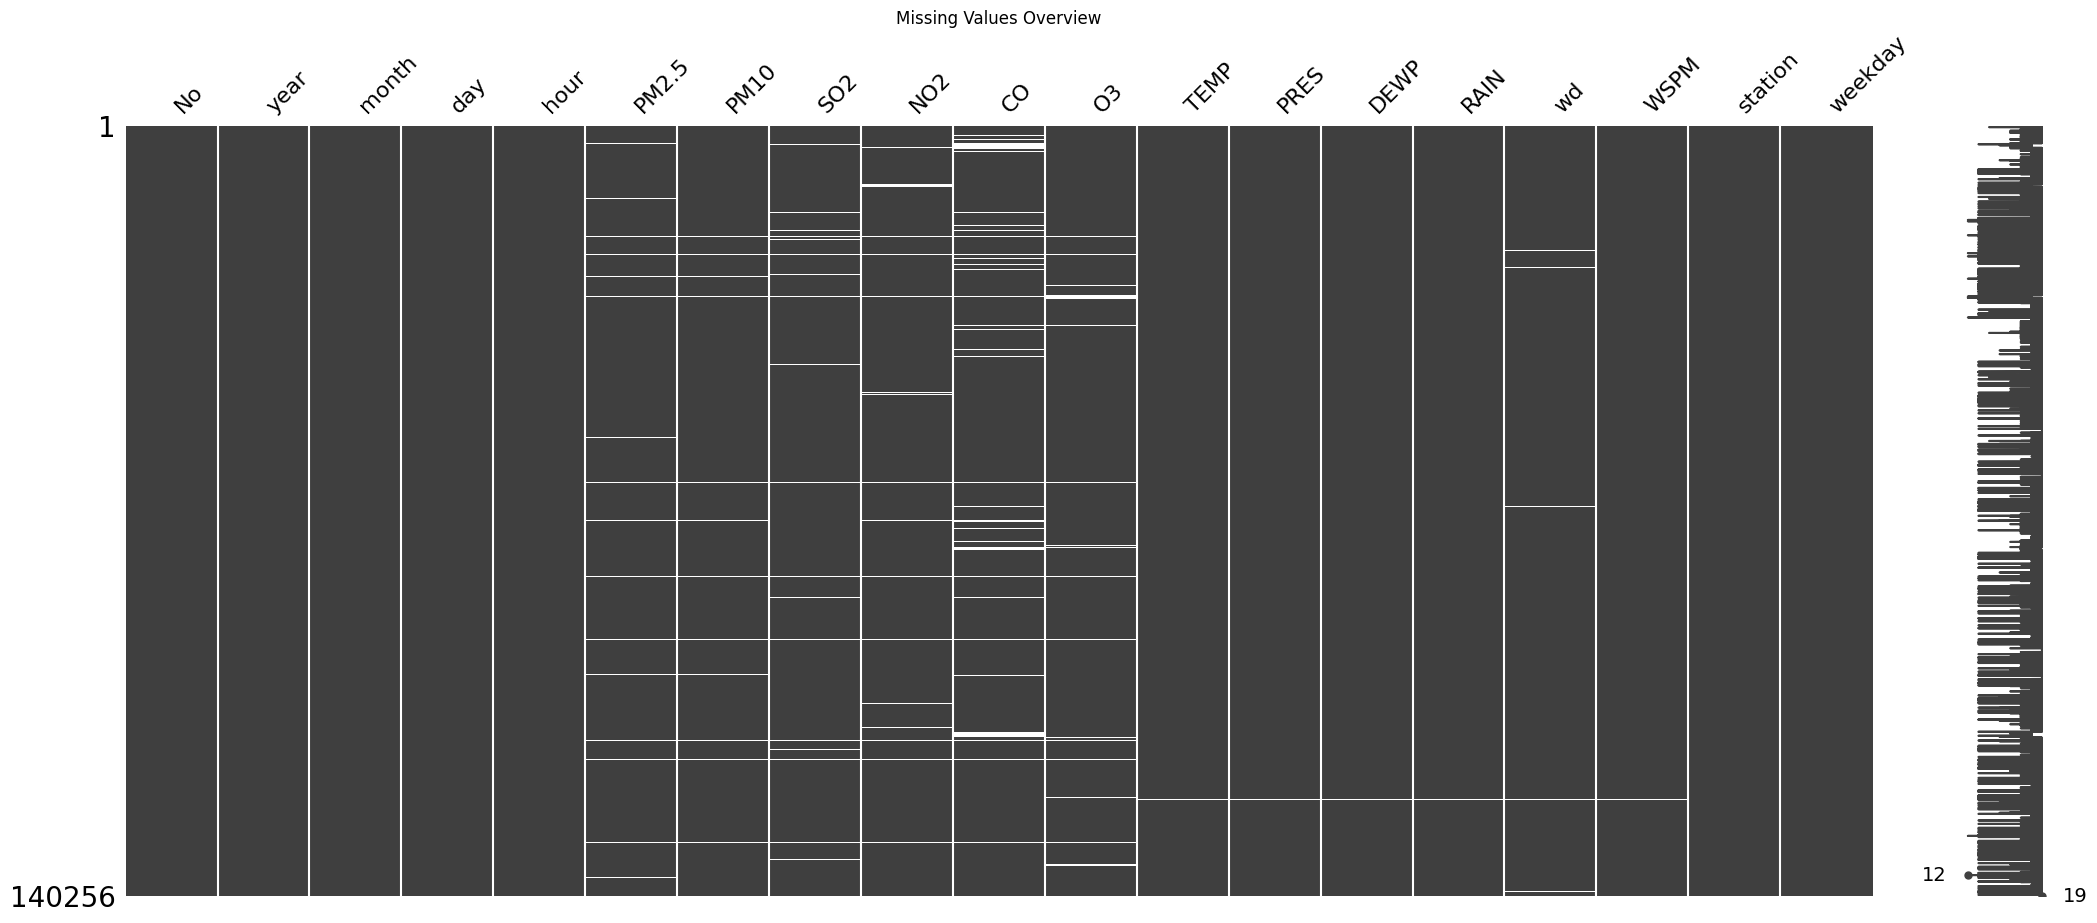

In [ ]:
import missingno as msno
msno.matrix(df)
plt.title('Missing Values Overview')
plt.show()

In [ ]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table.columns = ['Missing Values', '% of Total Values']

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    # Return styled DataFrame
    return mis_val_table.style.background_gradient(cmap='Greens')


In [ ]:
missing_values_table(df)


,Missing Values,% of Total Values
CO,7149,5.097108
O3,4382,3.124287
NO2,3950,2.816279
SO2,2946,2.100445
PM2.5,2936,2.093315
PM10,2073,1.478012
wd,782,0.557552
DEWP,147,0.104808
TEMP,144,0.102669
RAIN,142,0.101243


In [ ]:
# Fill missing PM2.5 with median
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)

In [ ]:
print(df.index)

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=140256, freq=None)


In [ ]:
df['wd'].fillna(df['wd'].mode()[0], inplace=True)


In [ ]:
numerical_cols = ['CO', 'O3', 'NO2', 'SO2', 'PM10', 'DEWP', 'TEMP', 'RAIN', 'PRES', 'WSPM']

# Fill missing values with median per station
for col in numerical_cols:
    df[col] = df.groupby('station')[col].transform(lambda x: x.fillna(x.median()))


In [ ]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


In [ ]:
missing_values_table(df)


,Missing Values,% of Total Values
No,0,0.000000
year,0,0.000000
month,0,0.000000
day,0,0.000000
hour,0,0.000000
PM2.5,0,0.000000
PM10,0,0.000000
SO2,0,0.000000
NO2,0,0.000000
CO,0,0.000000


In [ ]:
#converting the wind direction to numerical categories
df['wd'] = df['wd'].astype('category').cat.codes


In [ ]:
#added a season column based on the month

def get_season(month):
    if month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    elif month in [9, 10, 11]: return 'Autumn'
    else: return 'Winter'

df['season'] = df['month'].apply(get_season)


In [ ]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,weekday,season
datetime,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,7,9.3,Shunyi,4,Spring
2013-03-01 01:00:00,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,7,9.4,Shunyi,4,Spring
2013-03-01 02:00:00,3,2013,3,1,2,14.0,14.0,5.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,7,8.6,Shunyi,4,Spring
2013-03-01 03:00:00,4,2013,3,1,3,12.0,12.0,3.0,5.0,800.0,43.0,-2.1,1027.3,-23.3,0.0,7,6.6,Shunyi,4,Spring
2013-03-01 04:00:00,5,2013,3,1,4,12.0,12.0,3.0,37.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,7,4.5,Shunyi,4,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,5,1.3,Dingling,1,Winter
2017-02-28 20:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,3,2.1,Dingling,1,Winter
2017-02-28 21:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,3,1.5,Dingling,1,Winter


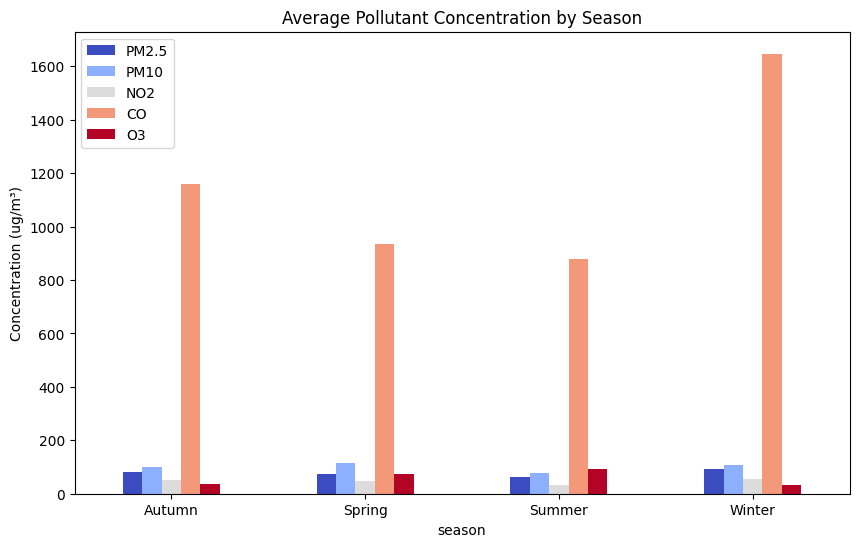

In [ ]:
seasonal_avg = df.groupby(['season'])[['PM2.5', 'PM10', 'NO2', 'CO', 'O3']].mean()

seasonal_avg.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title('Average Pollutant Concentration by Season')
plt.ylabel('Concentration (ug/m³)')
plt.xticks(rotation=0)
plt.show()


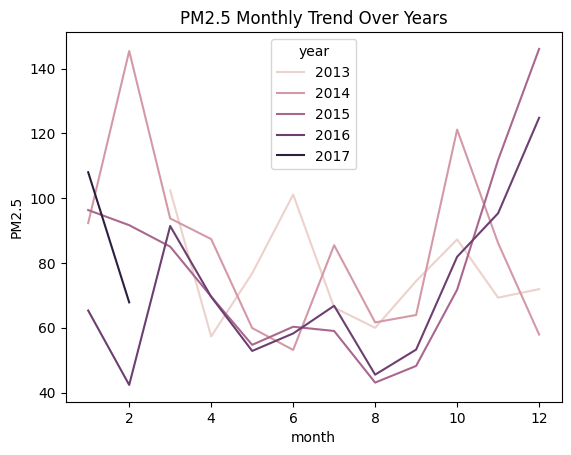

In [ ]:
monthly_trend = df.groupby(['year', 'month'])[['PM2.5', 'NO2', 'O3']].mean().reset_index()
sns.lineplot(data=monthly_trend, x='month', y='PM2.5', hue='year')
plt.title('PM2.5 Monthly Trend Over Years')
plt.show()


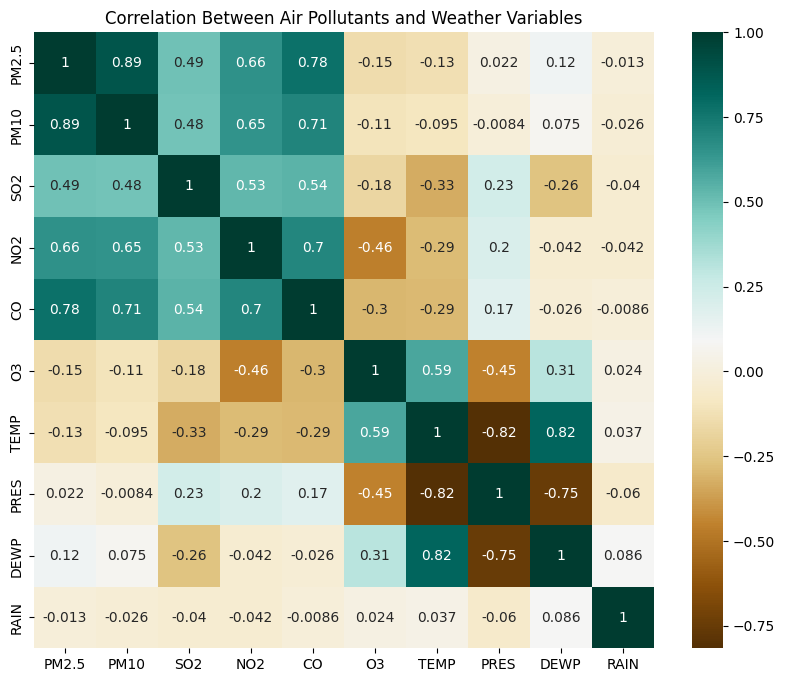

In [ ]:
corr = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='BrBG')
plt.title('Correlation Between Air Pollutants and Weather Variables')
plt.show()


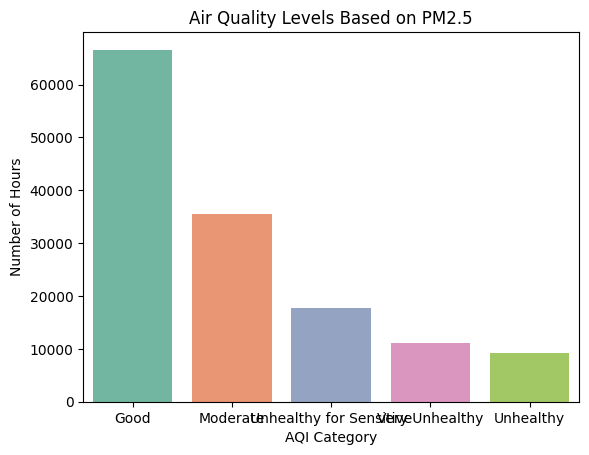

In [ ]:
def pm25_aqi_level(value):
    if value <= 50: return 'Good'
    elif value <= 100: return 'Moderate'
    elif value <= 150: return 'Unhealthy for Sensitive'
    elif value <= 200: return 'Unhealthy'
    else: return 'Very Unhealthy'

df['AQI_PM2.5'] = df['PM2.5'].apply(pm25_aqi_level)
aqi_counts = df['AQI_PM2.5'].value_counts()

sns.barplot(x=aqi_counts.index, y=aqi_counts.values, palette='Set2')
plt.title('Air Quality Levels Based on PM2.5')
plt.ylabel('Number of Hours')
plt.xlabel('AQI Category')
plt.show()


In [ ]:
worst_pm = df.groupby('station')['PM2.5'].mean().sort_values(ascending=False).head(5)
print(" Worst Stations according to the PM2.5:\n", worst_pm)


 Worst Stations according to the PM2.5:
 station
Nongzhanguan    84.268252
Guanyuan        82.407506
Shunyi          78.801811
Dingling        65.700915
Name: PM2.5, dtype: float64


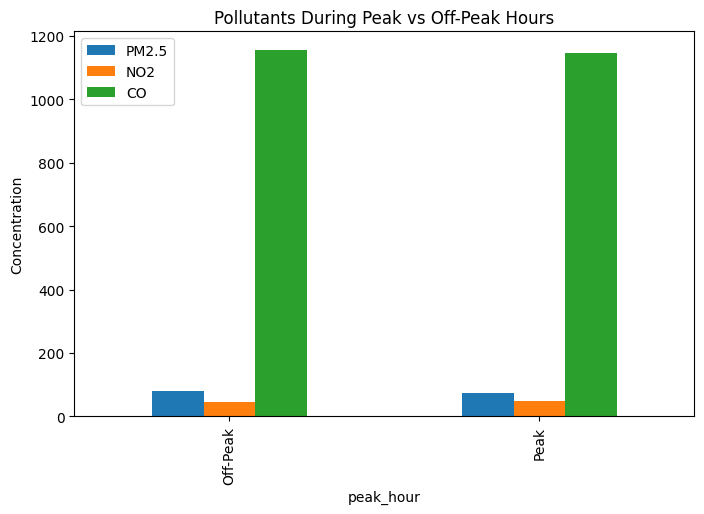

In [ ]:
df['peak_hour'] = df['hour'].apply(lambda x: 'Peak' if x in range(7,11) or x in range(17,21) else 'Off-Peak')
peak_pollution = df.groupby('peak_hour')[['PM2.5', 'NO2', 'CO']].mean()
peak_pollution.plot(kind='bar', figsize=(8,5), title="Pollutants During Peak vs Off-Peak Hours")
plt.ylabel("Concentration")
plt.show()


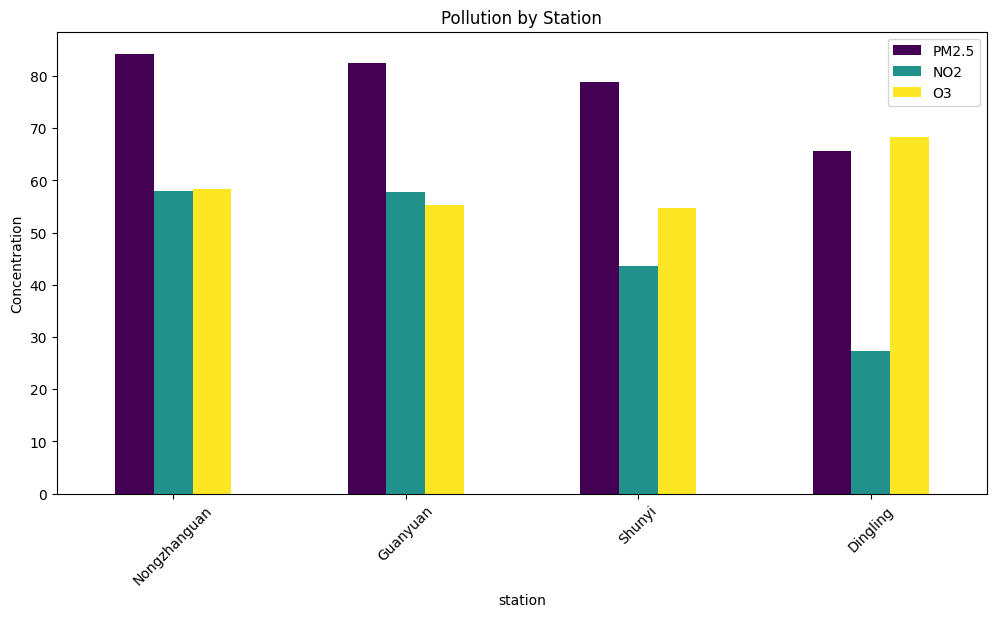

In [ ]:
station_pollution = df.groupby('station')[['PM2.5', 'NO2', 'O3']].mean().sort_values(by='PM2.5', ascending=False)
station_pollution.plot(kind='bar', figsize=(12,6), colormap='viridis')
plt.title('Pollution by Station')
plt.ylabel('Concentration')
plt.xticks(rotation=45)
plt.show()


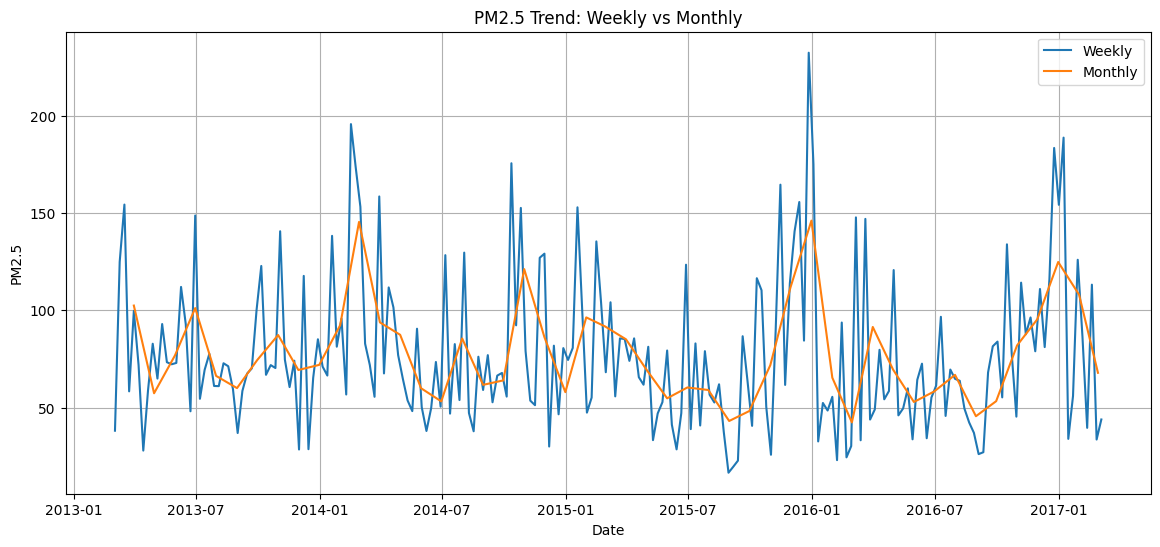

In [ ]:
# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Select only numeric columns for resampling
numeric_df = df.select_dtypes(include='number')

# Resample only numeric data
weekly_avg = numeric_df.resample('W').mean()
monthly_avg = numeric_df.resample('M').mean()

# Plot PM2.5 trend
plt.figure(figsize=(14,6))
plt.plot(weekly_avg['PM2.5'], label='Weekly')
plt.plot(monthly_avg['PM2.5'], label='Monthly')
plt.title('PM2.5 Trend: Weekly vs Monthly')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.grid(True)
plt.show()



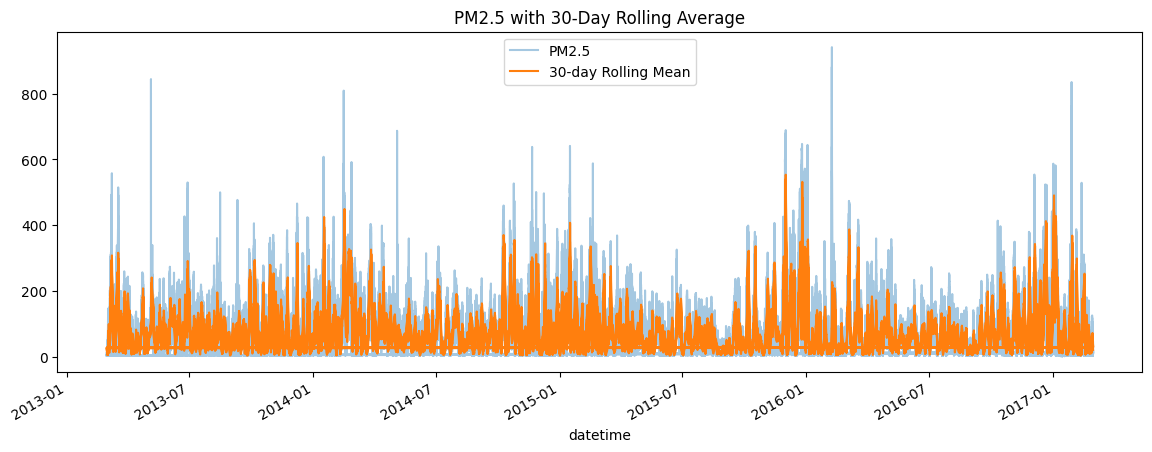

In [ ]:
df['PM2.5_Rolling'] = df['PM2.5'].rolling(window=30).mean()
df['PM2.5'].plot(figsize=(14,5), alpha=0.4, label='PM2.5')
df['PM2.5_Rolling'].plot(label='30-day Rolling Mean')
plt.legend()
plt.title('PM2.5 with 30-Day Rolling Average')
plt.show()


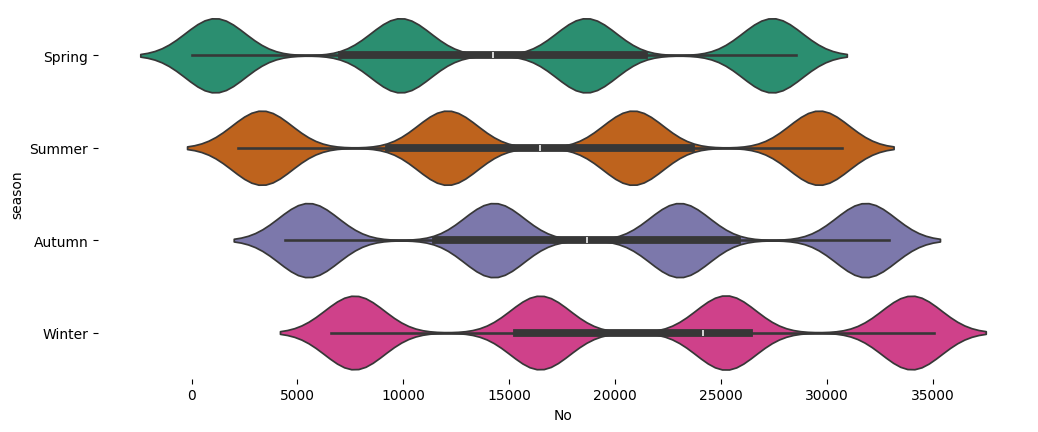

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='No', y='season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)


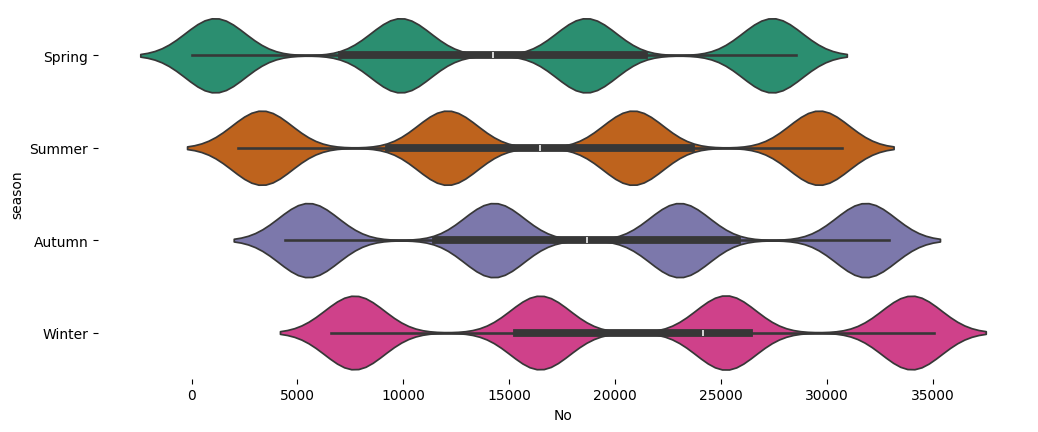

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='No', y='season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

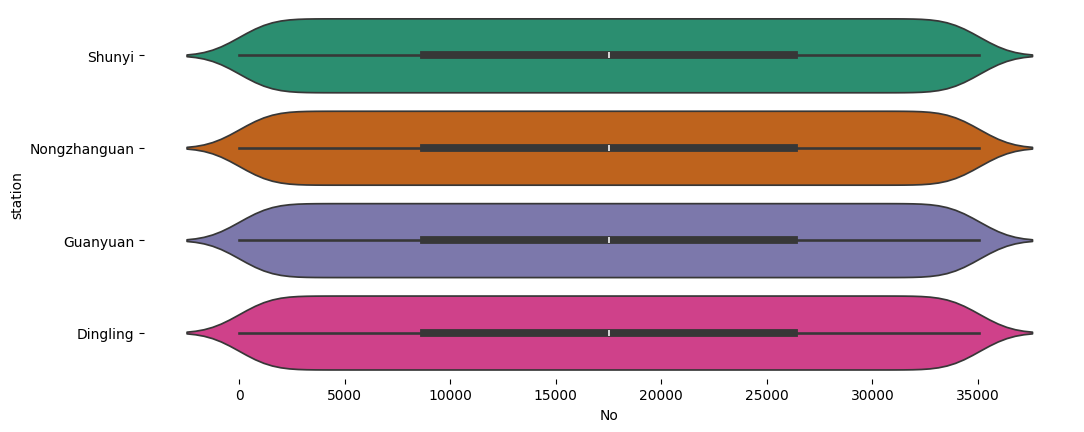

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['station'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='No', y='station', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

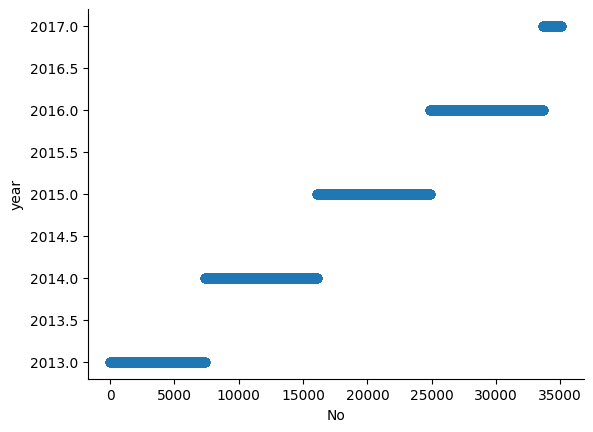

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='No', y='year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

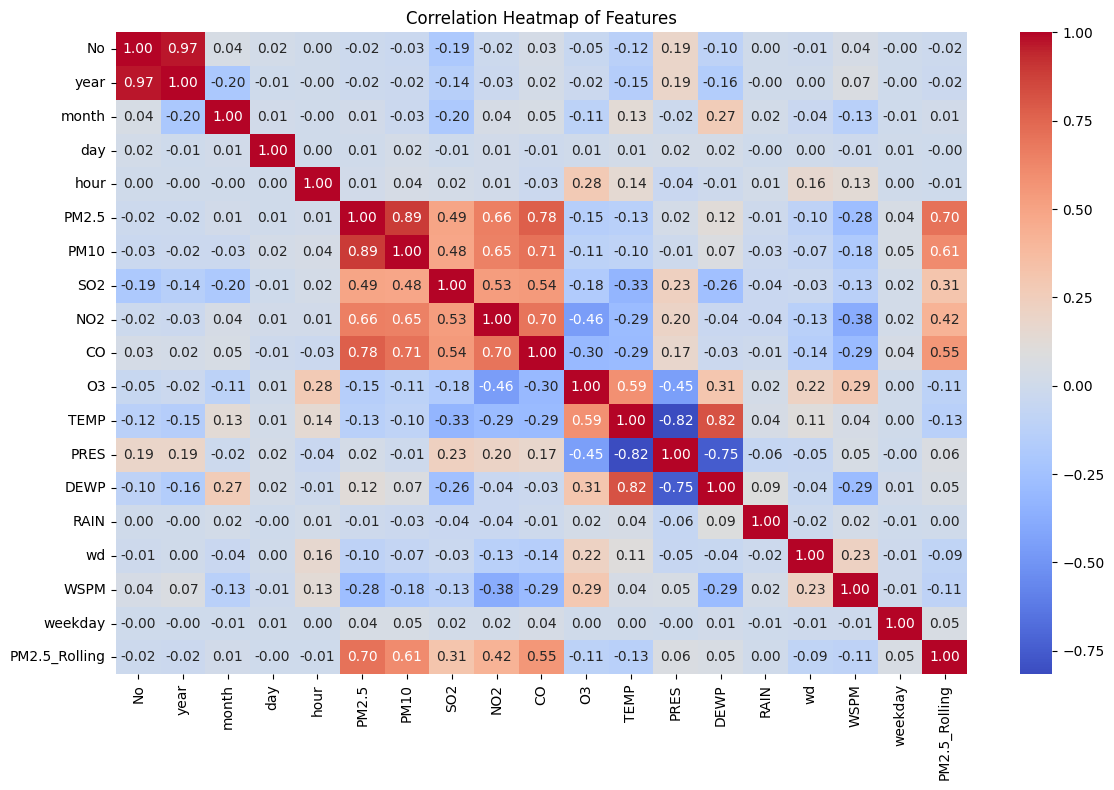

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()


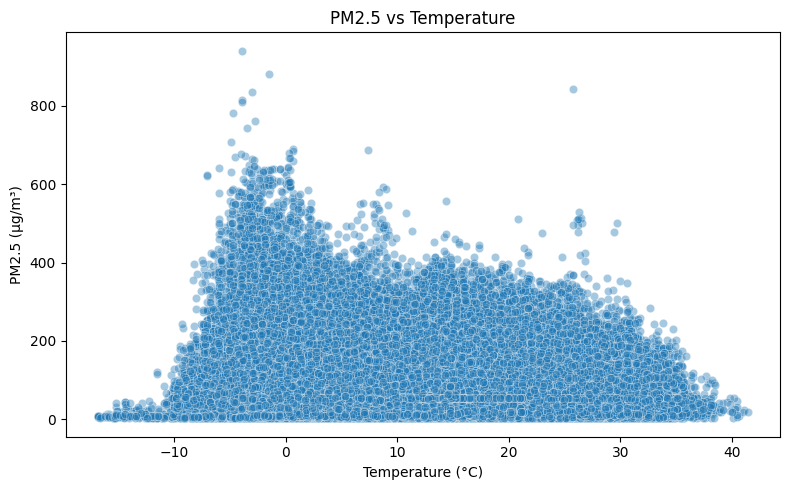

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='TEMP', y='PM2.5', alpha=0.4)
plt.title("PM2.5 vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.tight_layout()
plt.show()


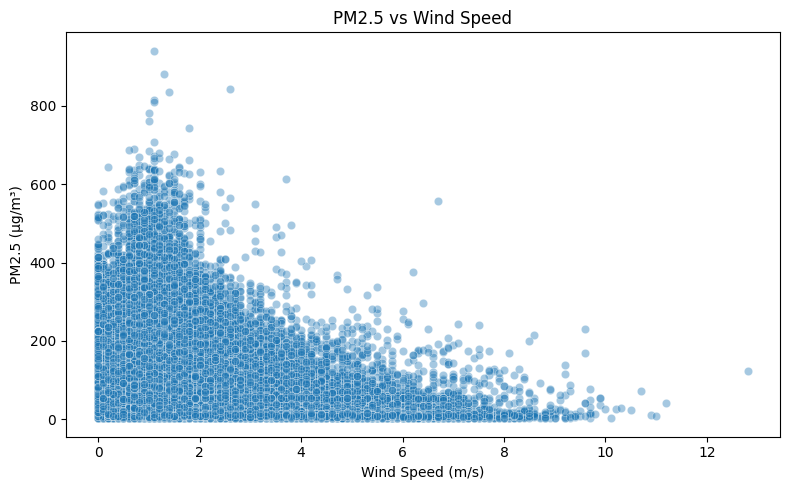

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='WSPM', y='PM2.5', alpha=0.4)
plt.title("PM2.5 vs Wind Speed")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("PM2.5 (µg/m³)")
plt.tight_layout()
plt.show()


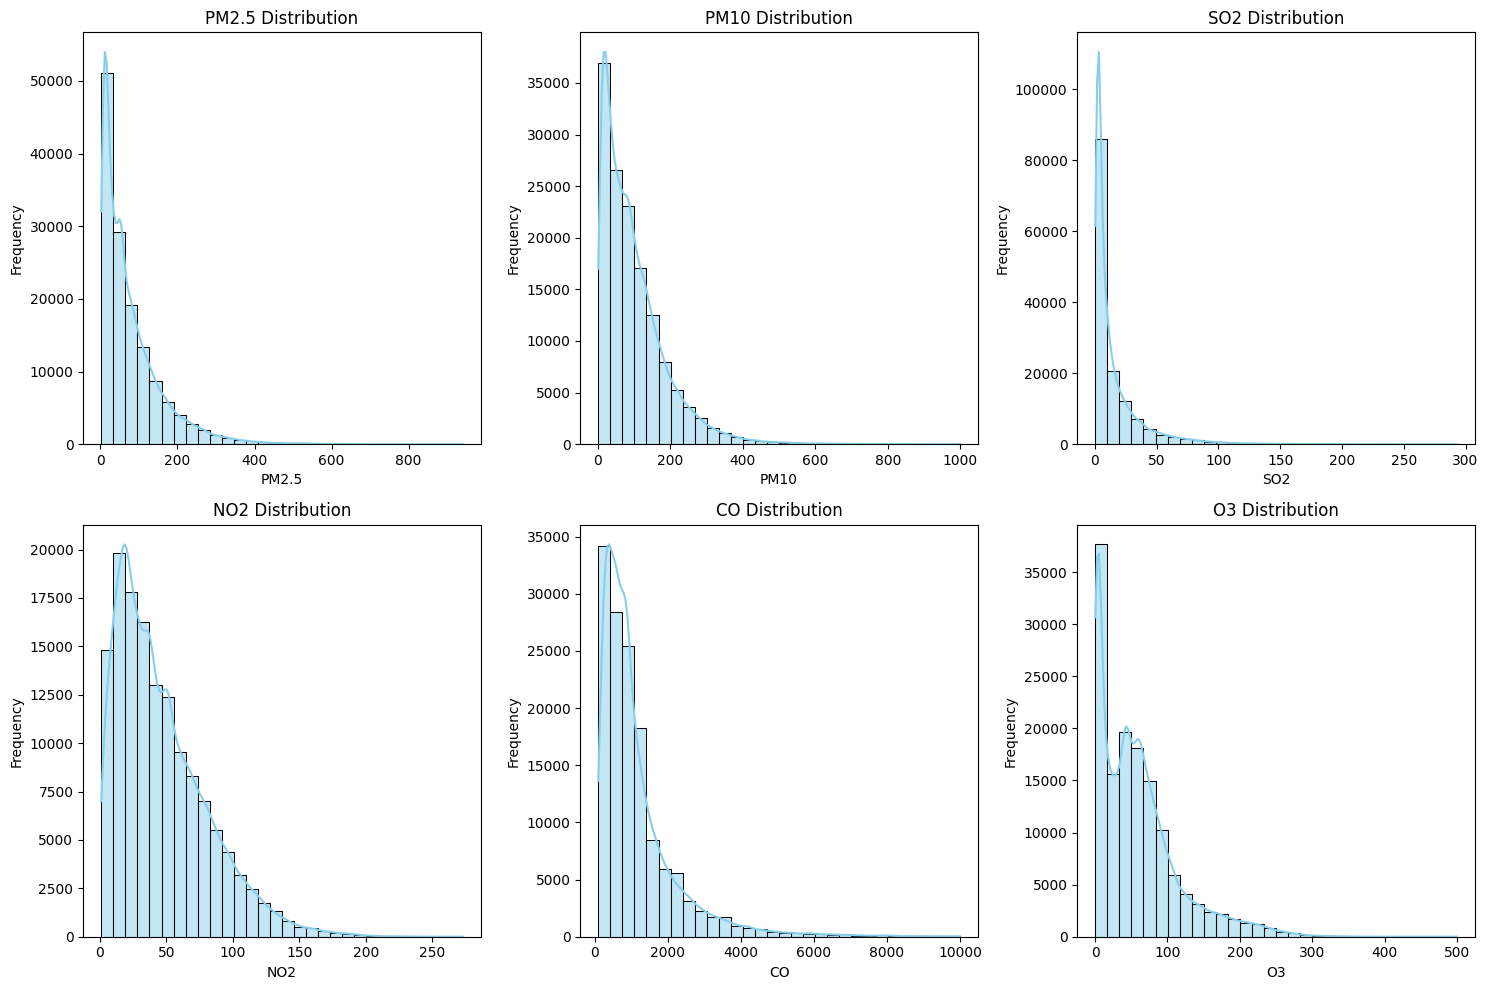

In [ ]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
plt.figure(figsize=(15, 10))

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[pollutant], bins=30, kde=True, color='skyblue')
    plt.title(f"{pollutant} Distribution")
    plt.xlabel(pollutant)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


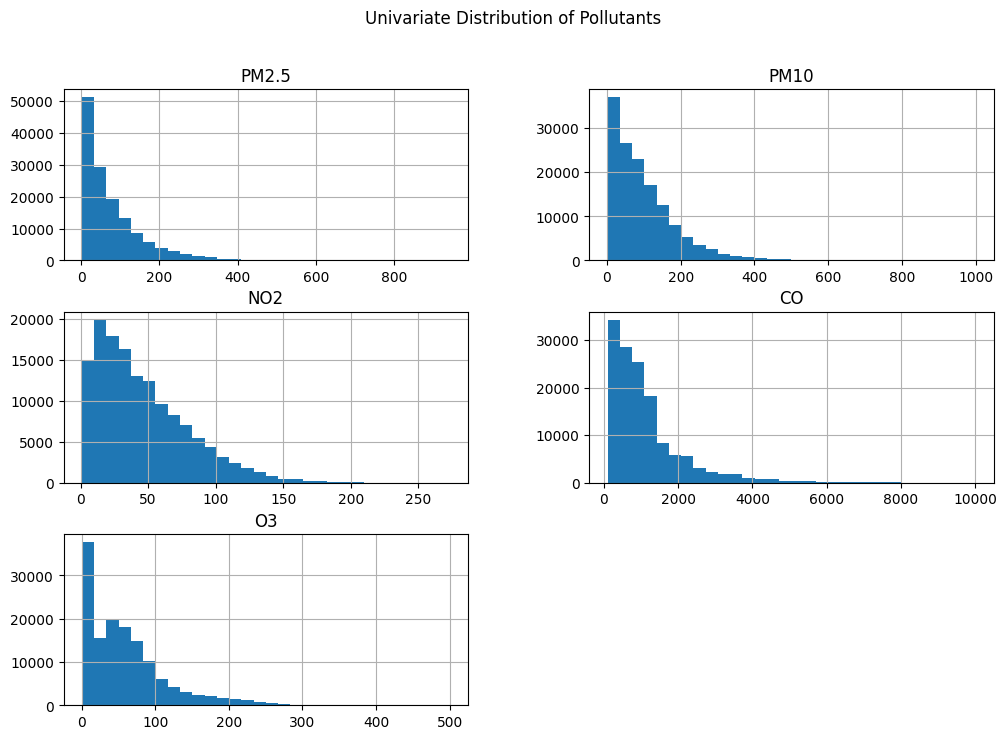

In [ ]:
df[['PM2.5', 'PM10', 'NO2', 'CO', 'O3']].hist(bins=30, figsize=(12, 8))
plt.suptitle("Univariate Distribution of Pollutants")
plt.show()


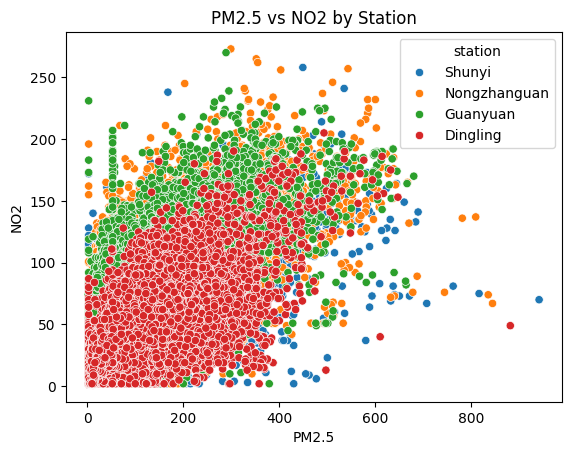

In [ ]:
sns.scatterplot(x='PM2.5', y='NO2', data=df, hue='station')
plt.title("PM2.5 vs NO2 by Station")
plt.show()


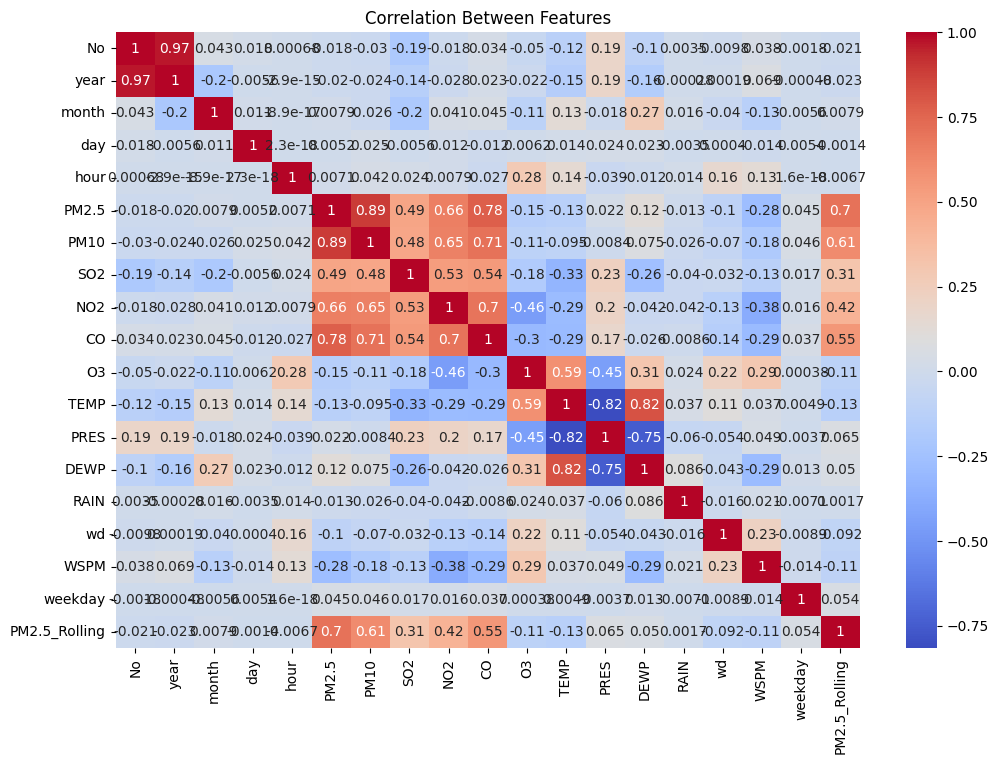

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


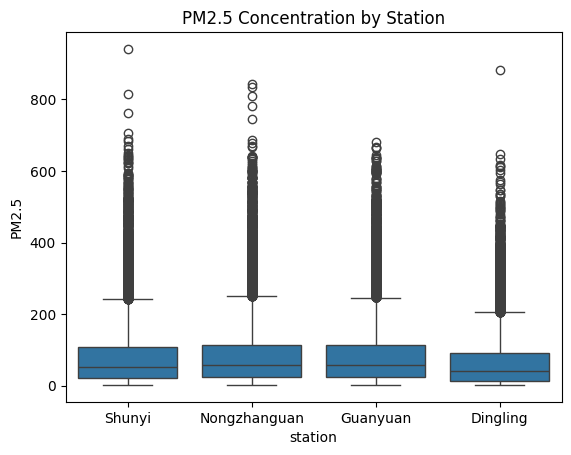

In [ ]:
sns.boxplot(x='station', y='PM2.5', data=df)
plt.title("PM2.5 Concentration by Station")
plt.show()


In [ ]:
df.to_csv('/content/drive/MyDrive/Programming for Data Analysis/Practical_Assignment_Final/filled_data.csv', index=False)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   No             140256 non-null  int64  
 1   year           140256 non-null  int64  
 2   month          140256 non-null  int64  
 3   day            140256 non-null  int64  
 4   hour           140256 non-null  int32  
 5   PM2.5          140256 non-null  float64
 6   PM10           140256 non-null  float64
 7   SO2            140256 non-null  float64
 8   NO2            140256 non-null  float64
 9   CO             140256 non-null  float64
 10  O3             140256 non-null  float64
 11  TEMP           140256 non-null  float64
 12  PRES           140256 non-null  float64
 13  DEWP           140256 non-null  float64
 14  RAIN           140256 non-null  float64
 15  wd             140256 non-null  int8   
 16  WSPM           140256 non-null  float64


**Modal Building**

Decision Tree Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Drop target leakage columns
X = df.drop(['No', 'PM2.5', 'PM2.5_Rolling', 'AQI_PM2.5'], axis=1)
y = df['AQI_PM2.5']

# Encode categorical features
categorical_cols = ['station', 'season', 'peak_hour']
X = X.copy()
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Decision Tree ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

# --- Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Decision Tree Accuracy: 0.8059318408669613
                         precision    recall  f1-score   support

                   Good       0.91      0.90      0.91     13435
               Moderate       0.71      0.71      0.71      7095
              Unhealthy       0.65      0.67      0.66      1819
Unhealthy for Sensitive       0.66      0.65      0.65      3573
         Very Unhealthy       0.87      0.88      0.88      2130

               accuracy                           0.81     28052
              macro avg       0.76      0.76      0.76     28052
           weighted avg       0.81      0.81      0.81     28052

Random Forest Accuracy: 0.8815414230714388
                         precision    recall  f1-score   support

                   Good       0.94      0.94      0.94     13435
               Moderate       0.82      0.84      0.83      7095
              Unhealthy       0.80      0.74      0.77      1819
Unhealthy for Sensitive       0.80      0.78      0.79      3573


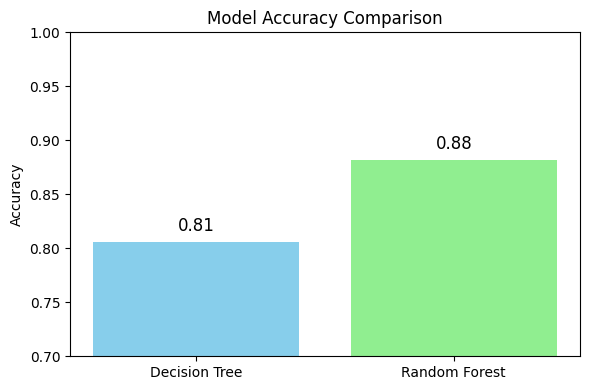

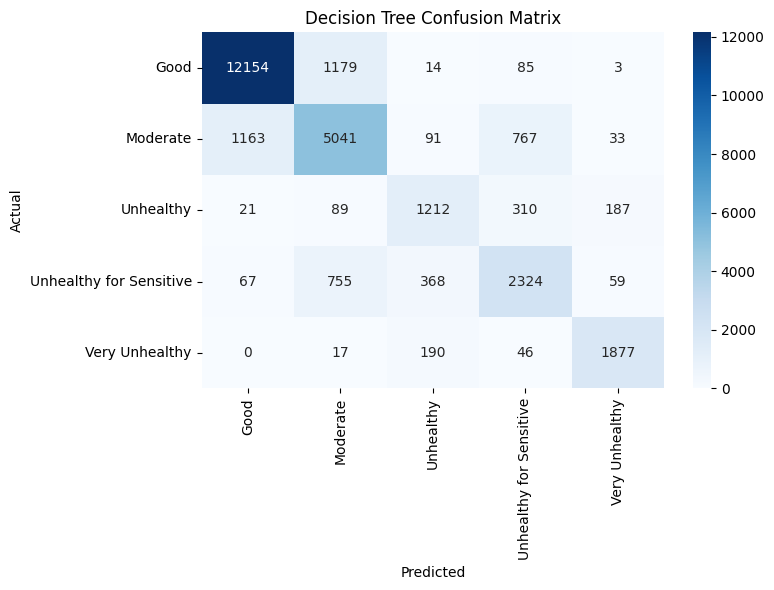

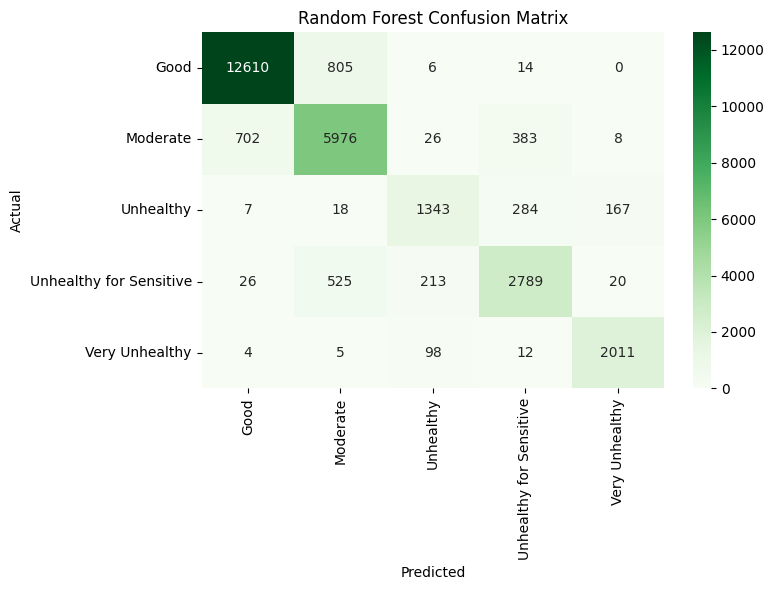

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Accuracy values from your results
dt_accuracy = 0.8059
rf_accuracy = 0.8815

# Plotting Accuracy Comparison
plt.figure(figsize=(6, 4))
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]
colors = ['skyblue', 'lightgreen']

plt.bar(models, accuracies, color=colors)
plt.ylim(0.7, 1.0)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Plot Confusion Matrices
labels = dt_model.classes_  # Gets class labels

# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_preds, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_preds, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()
